In [3]:
# too deep: batch norm

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_test, y_test), epochs=50)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)      

2022-01-26 14:23:23.437186: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-26 14:23:25.289427: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


196/196 [==============================] - 15s 54ms/step - loss: 1.8525 - accuracy: 0.4519 - val_loss: 3.7348 - val_accuracy: 0.1031
Epoch 2/50
196/196 [==============================] - 10s 49ms/step - loss: 1.0269 - accuracy: 0.6563 - val_loss: 2.5256 - val_accuracy: 0.3110
Epoch 3/50
196/196 [==============================] - 10s 49ms/step - loss: 0.7165 - accuracy: 0.7519 - val_loss: 0.9583 - val_accuracy: 0.6899
Epoch 4/50
196/196 [==============================] - 10s 49ms/step - loss: 0.5706 - accuracy: 0.8060 - val_loss: 0.7409 - val_accuracy: 0.7532
Epoch 5/50
196/196 [==============================] - 10s 49ms/step - loss: 0.4679 - accuracy: 0.8400 - val_loss: 0.6476 - val_accuracy: 0.7875
Epoch 6/50
196/196 [==============================] - 10s 49ms/step - loss: 0.3773 - accuracy: 0.8718 - val_loss: 0.6716 - val_accuracy: 0.7855
Epoch 7/50
196/196 [==============================] - 10s 49ms/step - loss: 0.3023 - accuracy: 0.8976 - val_loss: 0.6638 - val_accuracy: 0.8034
Epo

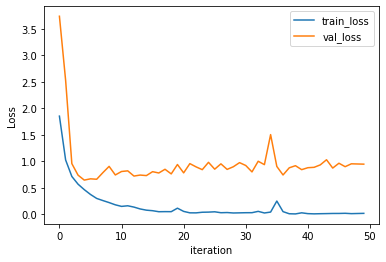

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

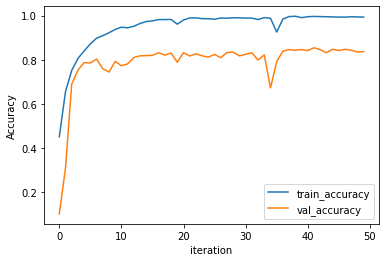

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()